In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
max_words=10000 #Reduces dimensionality
max_sequence_length=900 #reviews are the same length

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words) #words to number

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# x_train[0]

In [5]:
y_train[0]

np.int64(1)

In [6]:
from tensorflow import keras

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

# If a sequence is shorter than 500 ,it pads it with zeros at the beginning (by default).
# If a sequence is longer than 500, it truncates the beginning and keeps the last 500 values.

In [7]:
# x_train[0]

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

model = Sequential()
#Transforms each word index in the input into a dense vector of size 100.
#emb : Converts word indices to word vectors
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
#gmp : Reduces to 1 vector per sample by max-pooling
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#o/p layer : A single neuron with sigmoid activation
# for binary classification (positive or negative review).
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=512, epochs=30, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 912ms/step - accuracy: 0.6108 - loss: 0.6848 - val_accuracy: 0.8004 - val_loss: 0.6114
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 988ms/step - accuracy: 0.8154 - loss: 0.5567 - val_accuracy: 0.8353 - val_loss: 0.4212
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 998ms/step - accuracy: 0.8502 - loss: 0.3828 - val_accuracy: 0.8561 - val_loss: 0.3413
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 995ms/step - accuracy: 0.8747 - loss: 0.3086 - val_accuracy: 0.8644 - val_loss: 0.3176
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8936 - loss: 0.2611 - val_accuracy: 0.8739 - val_loss: 0.2977
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9093 - loss: 0.2290 - val_accuracy: 0.8782 - val_loss: 0.2895
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 927ms/step - accuracy: 0.9257 - loss: 0.1991 - val_accuracy: 0.8796 - val_loss: 0.2862
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9364 - loss: 0.1773 - val_accuracy: 0.8

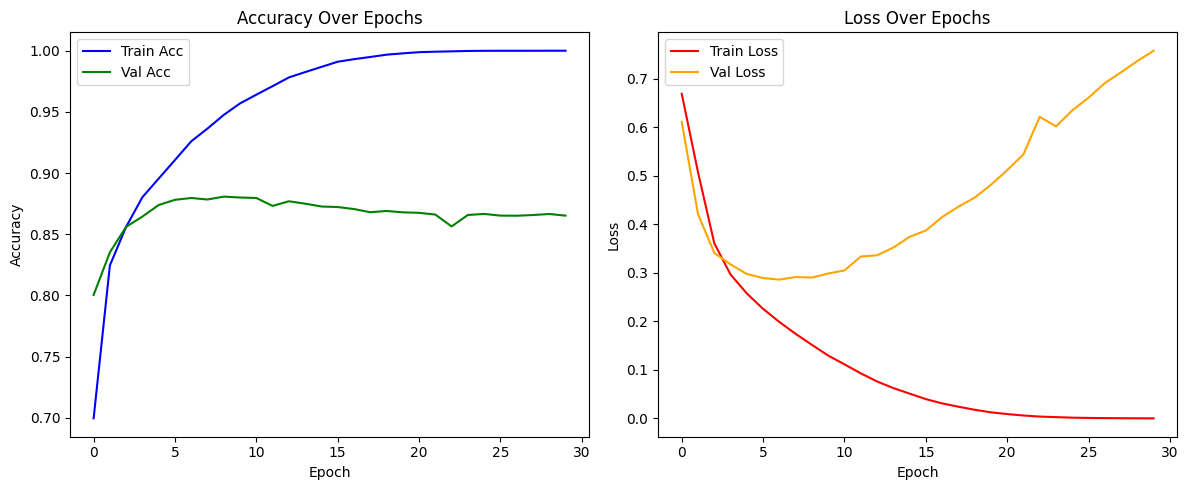

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluation

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:{:.2f}%".format(accuracy * 100))

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8626 - loss: 0.7675
Test Loss: 0.7581557631492615
Test Accuracy:86.52%


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


<Axes: >

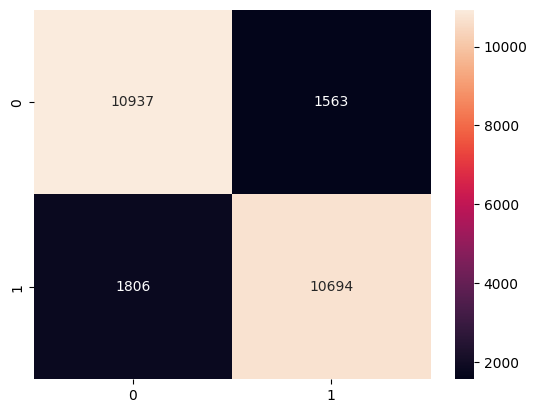

In [11]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')

#confusion_matrix: Calculates the number of true negative, false positives, false negatives,
# and true positive.

In [12]:
classification_rep = classification_report(y_test, y_pred)
print("Classificatio Report")
print(classification_rep)

Classificatio Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [13]:
# Sample Example

index=5

sample_review = x_test[index]
sample_review = sample_review.reshape(1, -1)

pred_prob = model.predict(sample_review)[0][0]
pred_label = int(pred_prob > 0.5)

print(f"Predicted Probability: {pred_prob}")
print("Predicted Sentiment:", "Positive" if pred_label == 1 else "Negative")
print("Actual Sentiment:","Positive" if y_test[index]==1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Probability: 0.9999887943267822
Predicted Sentiment: Positive
Actual Sentiment: Positive
